In [1]:
import numpy as np
from twoLayerNet import *
from mnist import load_mnist
from tqdm import tqdm
from matplotlib import pyplot as plt

In [2]:
class SGD:
    def __init__(self, lr =0.01):
        self.lr = lr

    def update(self,params, grads):
        for key in params.keys():
            params[key]-= self.lr*grads[key]

In [3]:
initialization_list = [0.01, 1/np.sqrt(50), np.sqrt(2)/np.sqrt(50)]

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:11<00:00, 890.86it/s]


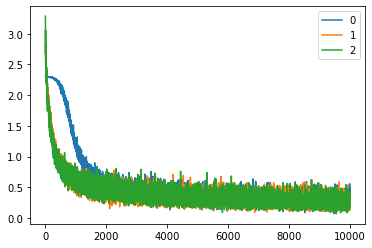

In [4]:
for k in range(len(initialization_list)):
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

    network = TwoLayerNet(input_size=784,hidden_size=50,output_size=10, weight_init_std=initialization_list[k])
    optimizer = SGD()
    
    # iters_num=100000
    iters_num=10000
    train_size = x_train.shape[0]
    batch_size = 100
    learning_rate = 0.1

    train_loss_list = []
    train_acc_list = []
    test_acc_list = []

    iter_per_epoch = max(train_size/batch_size,1)

    for i in tqdm(range(iters_num)):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        grad = network.gradient(x_batch, t_batch)
        optimizer.update(network.params, grad)

        loss = network.loss(x_batch, t_batch)
        train_loss_list.append(loss)

        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            test_acc = network.accuracy(x_test,t_test)
            train_acc_list.append(train_acc)
            test_acc_list.append(test_acc)
            
    plt.plot(range(10000),train_loss_list, label=k)
    plt.legend()


In [5]:
plt.show()